In [39]:
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.callbacks import Callback
from keras.models import load_model
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Workaround for Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized
# https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# https://github.com/dmlc/xgboost/issues/1715
# export KMP_DUPLICATE_LIB_OK=True
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# -----

def add_noise(img, noise_factor = 0.5):
    img_noisy = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape) 
    img_noisy = np.clip(img_noisy, 0., 1.)
    return img_noisy

def plot_images(images, title=""):
    figure = plt.figure()
    i = 0
    for img in images:
        ax = figure.add_subplot(len(images)/8 + 1, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(img), cmap = 'gray')
        i += 1
    figure.suptitle(title, fontsize=25)



In [2]:
# we don't care about the label in this scenario
(x_train, _), (x_test, _) = mnist.load_data()
# normalized the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


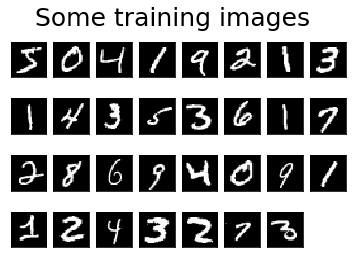

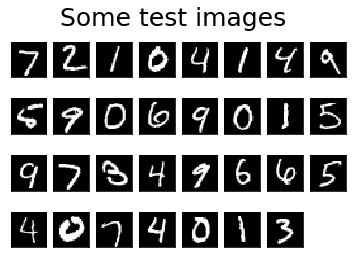

In [12]:
# visualize some test images
plot_images(x_train[:31,:], 'Some training images')
plot_images(x_test[:31,:], 'Some test images')

In [3]:
# First version
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(encoding_dim, activation='relu'))
model.add(Dense(28*28, activation='sigmoid'))
model.add(Reshape((28,28)))
model.compile(optimizer='adam', loss='mse')
model.summary()


W0808 16:29:02.433223 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 16:29:02.479749 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 16:29:02.496338 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 16:29:02.536715 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimiz

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoding_dim = 32
epochs = 10
model.fit(x_train, x_train, epochs=epochs, validation_data=(x_test, x_test))
model.save('auto.e10.h5')

W0808 16:29:08.197299 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0808 16:29:08.263472 140735987008384 deprecation_wrapper.py:119] From /Users/jean/miniconda3/envs/ml-laboratory/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.0320 - val_loss: 0.0163
Epoch 2/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0135 - val_loss: 0.0113
Epoch 3/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0112 - val_loss: 0.0105
Epoch 4/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.0108 - val_loss: 0.0103
Epoch 5/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.0106 - val_loss: 0.0101
Epoch 6/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0105 - val_loss: 0.0101
Epoch 7/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0104 - val_loss: 0.0100
Epoch 8/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0103 - val_loss: 0.0100
Epoch 9/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0103 - val_loss: 0.0

In [13]:
model = load_model('auto.e10.h5')

In [ ]:
# Run the auto encoder model on another input image
def show_encoding(model, test_set, sample_size=8, noise=0.5)
    test_images = test_set[np.random.choice(len(test_set), 
                                            sample_size=8, 
                                            replace=False)]
    test_images = [add_noise(img, noise) for img in test_images]
    plot_images(test_images, title='Original images')
    generated = [model.predict(img.reshape(1,28,28))[0].reshape(28,28,1) for img in test_images]
    plot_images(np.array(generated), title='Generated images')

show_encoding(model, x_test, sample_size=8, noise=0.2)

In [ ]:
encoding_dim = 32
epochs = 50
model.fit(x_train, x_train, epochs=epochs, validation_data=(x_test, x_test))
model.save('auto.e50.h5')

In [15]:
# Run the auto encoder model on another input image
model = load_model('auto.e50.h5')
show_encoding(model, x_test, sample_size=8, noise=0.2)

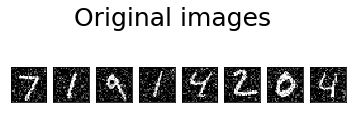

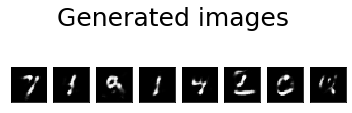

In [34]:
# test_images = x_test[np.random.choice(len(test_images), size=8, replace=False)]
# test_images = [add_noise(img, 0.25) for img in test_images]
# plot_images(test_images, title='Original images')
# generated = [model.predict(img.reshape(1,28,28))[0].reshape(28,28,1) for img in test_images]
# plot_images(np.array(generated), title='Generated images')

In [43]:
# 2nd version: CNN
cnn = Sequential()
cnn.add(Reshape((28, 28, 1), input_shape=(28, 28)))

cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))

cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(UpSampling2D((2, 2)))

cnn.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

cnn.add(Reshape((28, 28)))
cnn.compile(optimizer='adam', loss='mse')
cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 1)         289       
_________________________________________________________________
reshape_9 (Reshape)          (None, 28, 28)            0         
Total para

In [44]:
encoding_dim = 32
epochs = 10
cnn.fit(x_train, x_train, epochs=epochs, validation_data=(x_test, x_test))
cnn.save('auto.cnn.e10.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0019 - val_loss: 6.1490e-04
Epoch 2/50
60000/60000 [==============================] - 136s 2ms/step - loss: 5.1066e-04 - val_loss: 4.3693e-04
Epoch 3/50
60000/60000 [==============================] - 134s 2ms/step - loss: 4.0623e-04 - val_loss: 3.6408e-04
Epoch 4/50
60000/60000 [==============================] - 134s 2ms/step - loss: 3.4843e-04 - val_loss: 3.1962e-04
Epoch 5/50
60000/60000 [==============================] - 134s 2ms/step - loss: 3.1569e-04 - val_loss: 2.9788e-04
Epoch 6/50
60000/60000 [==============================] - 134s 2ms/step - loss: 2.9816e-04 - val_loss: 2.8737e-04
Epoch 7/50
60000/60000 [==============================] - 134s 2ms/step - loss: 2.8550e-04 - val_loss: 2.8156e-04
Epoch 8/50
60000/60000 [==============================] - 133s 2ms/step - loss: 2.7693e-04 - val_loss: 2.6692e-04
Epoch 9/50
60000/60000 [==================

KeyboardInterrupt: 

In [ ]:
model = load_model('auto.cnn.e50.h5')
show_encoding(model, x_test, sample_size=8, noise=0.2)